# Курсовой проект по машинному обучению
# Анализ клиентской оттока и разработка стратегии удержания клиентов
# Использование данных о клиентах X-компании для анализа оттока и разработки стратегии удержания.


#### В этом анализе мы пытаемся понять и предсказать, когда клиенты перестают пользоваться услугами бизнеса, который предлагает программу лояльности. В нашем случае клиенты получают бонусные баллы за покупки или перелеты, и затем могут использовать эти баллы для бронирования билетов, отелей или аренды автомобилей. Основная цель - создать компьютерную модель, которая может предсказывать, с какой вероятностью клиент перестанет пользоваться этими бонусами и станет неактивным в течение следующих 12 месяцев.

##### Клиент считается "переставшим" (или "неактивным"), если он не собирает бонусные баллы и не использует их для покупок в течение 12 последовательных месяцев. Сбор баллов происходит, когда клиент взаимодействует с бизнесом и получает бонусы. Использование баллов (редемпшн) означает использование этих бонусов для бронирования или покупок.

##### Данные, которые у нас есть, включают информацию о клиентах и указывают, активны они сейчас или уже перестали пользоваться бонусами. Наша задача - использовать эти данные для создания модели, которая сможет успешно предсказывать, когда клиенты могут перестать быть активными.

##### Этот анализ будет проводиться следующим образом:

##### Исследование данных: Мы начнем с понимания характера наших данных, рассмотрим каждый признак и выведем первичные инсайты.

##### Очистка данных и предобработка: Любые отсутствующие или несогласованные данные будут обработаны на этапе очистки данных. Если необходимо, мы также создадим дополнительные признаки и преобразуем категориальные данные в числовые.

##### Построение модели: На этом этапе мы выберем подходящий алгоритм машинного обучения для обучения модели на наших данных. Выбор алгоритма зависит от природы и распределения наших данных.

##### Оценка и оптимизация модели: Мы оценим начальную производительность нашей модели и оптимизируем ее для лучшей точности с использованием техник, таких как кросс-валидация и настройка гиперпараметров.

##### Сравнение и выбор модели: Мы сравним разработанные модели и выберем наиболее подходящую для нашего случая.

##### Дополнительные предложения по снижению оттока: Наконец, мы используем оптимизированную модель для представления ключевых результатов и предложения маркетинговых стратегий, которые в конечном итоге снизят уровень оттока клиентов.

## Исследование данных


#### В данном разделе проводится исследование набора данных для получения всестороннего понимания его характеристик. Этот этап является ключевым перед переходом к построению моделей, поскольку он предоставляет информацию о распределении, возможных выбросах и общей структуре данных. Анализ в первую очередь будет ориентирован на признаки, предоставленные в наборе данных, включая:

#### State: Целевая переменная, указывающая статус клиента (активен или перестал пользоваться услугами), где 0 означает активного клиента, а 1 - клиента, переставшего пользоваться услугами.

#### Sum_collect: Общее количество раз, когда клиент накопил бонусные баллы.

#### Sum_redeem: Общее количество раз, когда клиент использовал бонусные баллы.

#### Sum_collect_points: Общее количество бонусных баллов, которые клиент накопил за период своего участия.

#### Sum_redeem_points: Общее количество бонусных баллов, которые клиент использовал.

#### Years_in_the_program: Общее количество лет, которое клиент участвует в программе лояльности.

#### Months_since_last_transaction: Количество месяцев с момента последнего взаимодействия клиента (накопление или использование баллов).

In [1]:
# импортирование необходимых библиотек 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Загрузка данных
df = pd.read_csv('dataset/CustomerChurnTrainingData.csv')

# Показать первые 20 строк
df.head(20)

,state,sum_collect,sum_redeem,sum_collect_points,sum_redeem_points,years_in_the_program,months_since_last_transaction
0,0,13,0,1269,0.0,19,1
1,1,6,0,2890,0.0,10,10
2,1,2,0,422,0.0,7,9
3,0,7,1,2690,14500.0,16,1
4,1,7,0,211,0.0,2,3
5,1,2,0,40,0.0,3,10
6,1,15,0,1136,0.0,4,9
7,1,13,0,636,0.0,2,9
8,1,11,0,5785,0.0,4,1
9,0,5,0,150,0.0,16,1


In [2]:
# Размер CSV-файла
df.shape

(5000, 7)

In [3]:
# Проверить типы данных признаков
df.dtypes

state                              int64
sum_collect                        int64
sum_redeem                         int64
sum_collect_points                 int64
sum_redeem_points                float64
years_in_the_program               int64
months_since_last_transaction      int64
dtype: object

In [4]:
# Описание
df.describe()

,state,sum_collect,sum_redeem,sum_collect_points,sum_redeem_points,years_in_the_program,months_since_last_transaction
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000,5000.00000
mean,0.499200,9.133600,0.166200,6235.350000,2827.35420,9.11940,3.82760
std,0.500049,8.991236,0.622459,16739.259116,14742.02891,6.73595,3.23765
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,1.00000
25%,0.000000,4.000000,0.000000,297.750000,0.00000,5.00000,1.00000
50%,0.000000,6.000000,0.000000,1220.000000,0.00000,6.00000,3.00000
75%,1.000000,13.000000,0.000000,4662.750000,0.00000,13.00000,6.00000
max,1.000000,205.000000,10.000000,304174.000000,401800.00000,27.00000,12.00000


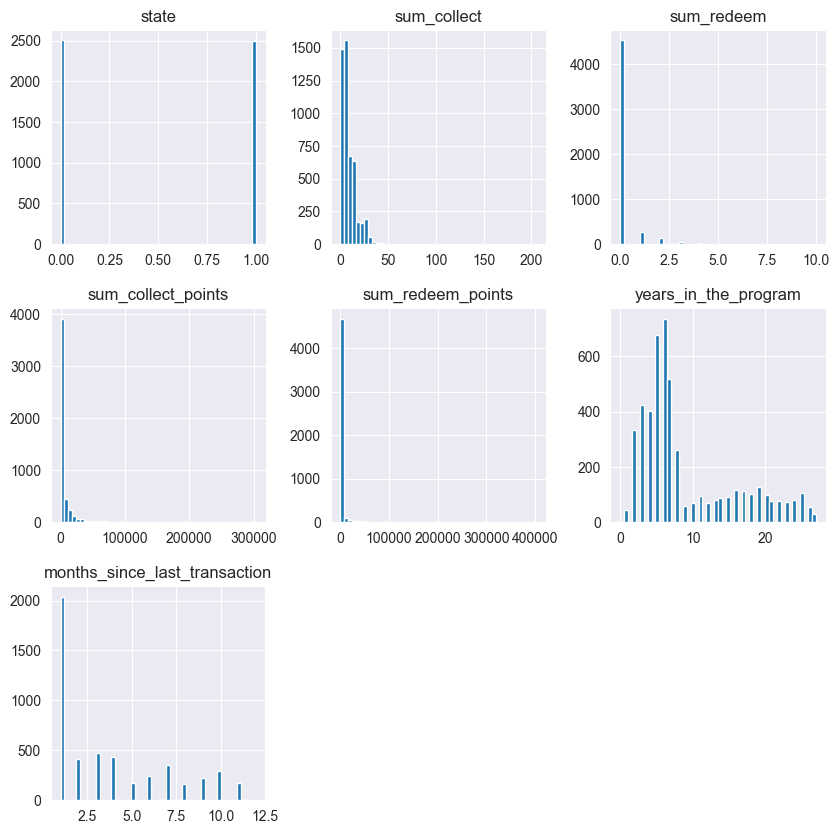

In [5]:
# Построим гистограммы каждого числового признака для одномерного анализа.
df.hist(figsize=(10, 10), bins=50)
plt.show()





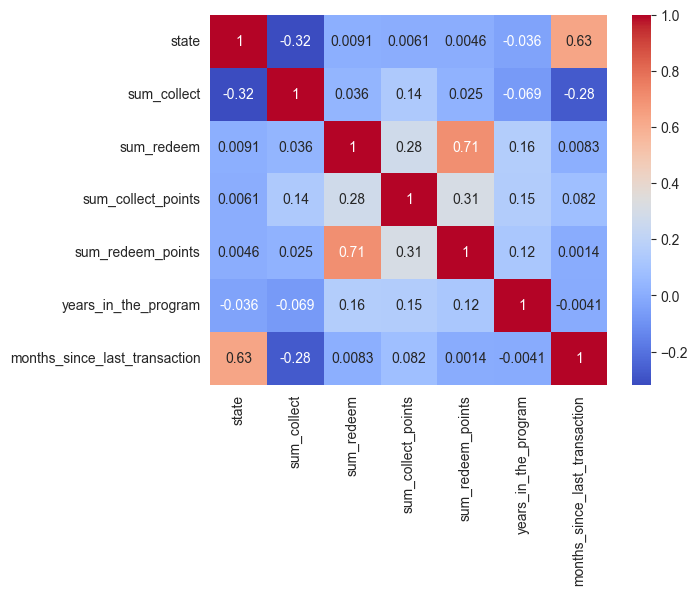

In [6]:
# Построим корреляционную матрицу, чтобы понять взаимосвязь между объектами.
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

##### Этот фрагмент анализа рассматривает матрицу корреляции, чтобы выявить взаимосвязи между различными признаками в данных. Вот ключевые выводы:

###### 1. **State и Months_since_last_transaction:** Эти два признака имеют довольно сильную положительную корреляцию (0,63). Это означает, что чем больше месяцев проходит с момента последней транзакции, тем вероятнее, что клиент уйдет.
###### 2. **State и Sum_collect:** Между этими двумя переменными наблюдается умеренная отрицательная корреляция (-0,317). Это подразумевает, что клиенты, которые собирают больше баллов, менее вероятно уйдут.
###### 3. **Sum_redeem и Sum_redeem_points:** Эти два признака имеют сильную положительную корреляцию (0,706). Это означает, что с увеличением количества раз, когда клиент погашает баллы, также увеличивается общее количество погашенных баллов.
###### 4. **Sum_redeem и Sum_collect_points:** Существует умеренная положительная корреляция (0,277) между этими переменными, что указывает на то, что клиенты, которые собирают больше баллов, вероятно, будут чаще погашать их.
###### 5. **Years_in_the_program и Sum_redeem, Sum_collect_points, Sum_redeem_points:** Эти признаки имеют слабые положительные корреляции. Это может указывать на то, что чем дольше клиент участвует в программе лояльности, тем активнее он взаимодействует с программой.
###### 6. **Months_since_last_transaction и Sum_collect:** Существует умеренная отрицательная корреляция (-0,276), что означает, что клиенты, которые чаще собирают баллы, склонны к более недавним транзакциям.
###### Эти наблюдения важны для понимания взаимосвязей между признаками и будут полезны при выборе признаков для моделирования. Однако следует помнить, что корреляция не подразумевает причинно-следственной связи, и эти выводы основаны на линейных отношениях между переменными. В реальности может быть и нелинейные взаимосвязи, которые корреляция не улавливает.

In [7]:
# Проверка, нет ли пропущенных значений.
df.isnull().sum()

state                            0
sum_collect                      0
sum_redeem                       0
sum_collect_points               0
sum_redeem_points                0
years_in_the_program             0
months_since_last_transaction    0
dtype: int64

## Очистка и предварительная обработка данных

In [8]:
# Разработка функций
# Для разработки функций мы создадим соотношение sum_collect_points к sum_redeem_points как показатель склонности клиента экономить баллы.
df['collect_to_redeem_ratio'] = df['sum_collect_points'] / df['sum_redeem_points']
df['collect_to_redeem_ratio'].replace(np.inf, 0, inplace=True) # Заменить все значения бесконечности, вызванные делением на ноль.
df['collect_to_redeem_ratio'].fillna(0, inplace=True) # Заменить все значения NaN, возникающие из-за отсутствующих данных.

df['collect_to_redeem_ratio'].describe()

count    5000.000000
mean        0.157471
std         1.420150
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        67.594222
Name: collect_to_redeem_ratio, dtype: float64


###### Созданное отношение "collect_to_redeem_ratio" показывает, что в среднем клиенты собирают больше баллов, чем используют (среднее значение 0.157). Однако стандартное отклонение высоко, что указывает на разнообразие в поведении клиентов. Большинство клиентов либо не использует баллы, либо использует их сразу, но есть и те, кто предпочитает сохранять баллы, что видно по небольшому числу клиентов с высоким отношением сбора к использованию. Созданный признак будет удален перед построением модели для избежания искажений.

In [9]:
df = df.drop(['collect_to_redeem_ratio'], axis=1)

## Построение модели

### Logistic Regression Model

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Разделим данные на обучающие и тестовые наборы.
X_train, X_test, y_train, y_test = train_test_split(df.drop('state', axis=1), df['state'], test_size=0.2, random_state=556555)

# Инициализируем модель логистической регрессии.
lr_model = LogisticRegression()

# Подгоните модель к обучающим данным.
lr_model.fit(X_train,y_train)



LogisticRegression()

Точность на тестовом наборе:  0.826 


Отчет о классификации:

               precision    recall  f1-score   support

           0       0.83      0.82      0.82       491
           1       0.83      0.83      0.83       509

    accuracy                           0.83      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.83      0.83      0.83      1000
 

Матрица путаницы:


,Активные (Предсказанные),Ушедшие (Предсказанные)
Активные (Фактические),402,89
Ушедшие (Фактические),85,424


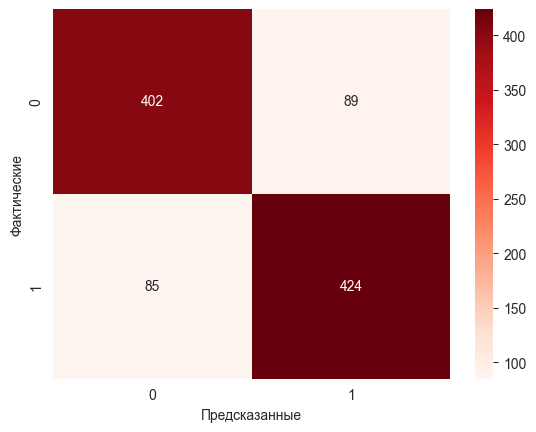

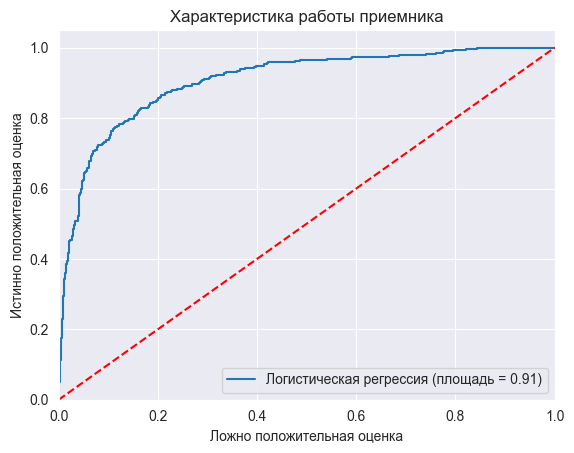




Модель логистической регрессии
Процент ошибочной классификации:  0.174


,признак,важность
5,months_since_last_transaction,4.963552e-01
1,sum_redeem,1.879634e-03
3,sum_redeem_points,8.544757e-07
2,sum_collect_points,-1.357102e-06
4,years_in_the_program,-5.766004e-02
0,sum_collect,-1.269574e-01


In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Оценим модель на тестовом наборе (точность).
y_test_pred = lr_model.predict(X_test)
print("Точность на тестовом наборе: ", accuracy_score(y_test, y_test_pred), "\n")

# Распечатаем отчет о классификации.
print("\nОтчет о классификации:\n\n", classification_report(y_test, y_test_pred), "\n")

print("Матрица путаницы:")

# Матрица путаницы.
cm = confusion_matrix(y_test, y_test_pred)

# Преобразуем матрицу путаницы в DataFrame для лучшей визуализации.
cm_df = pd.DataFrame(cm, index=['Активные (Фактические)', 'Ушедшие (Фактические)'],
                     columns=['Активные (Предсказанные)', 'Ушедшие (Предсказанные)'])

# Отобразили матрицу путаницы.
display(cm_df)

# Выведем пустую строку для наглядности.
print("\n")

# Выведем пустую строку для целей ясности.
print("\n")

# Выведем матрицу ошибок.
confusion_mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap='Reds')
plt.xlabel('Предсказанные')
plt.ylabel('Фактические')
plt.show()

# Выведем пустую строку для целей ясности.
print("\n")

# Построить ROC-кривую.
# Вычислим вероятности получения положительного класса.
y_scores = lr_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_scores)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Построим ROC-кривую.
plt.figure()
plt.plot(fpr, tpr, label='Логистическая регрессия (площадь = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложно положительная оценка')
plt.ylabel('Истинно положительная оценка')
plt.title('Характеристика работы приемника')
plt.legend(loc="lower right")
plt.show()

# Выведем пустую строку для большей ясности.
print("\n")

# Вычислим процент ошибочной классификации для модели логистической регрессии.
misclassification_rate_lr = (cm[0][1] + cm[1][0]) / cm.sum()
print("\nМодель логистической регрессии")
print("Процент ошибочной классификации: ", misclassification_rate_lr)

# Выведем пустую строку для большей ясности.
print("\n")

# Определим важность признаков.
# !!!!!!!
# "Выведем важность признаков."
importance = lr_model.coef_[0]
feature_importance = pd.DataFrame({'признак': X_train.columns, 'важность': importance})
feature_importance.sort_values(by='важность', ascending=False)
